In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
# read and inspect the data
df1 = pd.read_csv('../data/table_1.csv', delimiter=';')
df1.head()


,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq


In [9]:
# Understanding the data at hand
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4070 non-null   int64  
 1   UKL     4070 non-null   int64  
 2   GJAH    4006 non-null   object 
 3   ZIK     1705 non-null   object 
 4   HUI     4070 non-null   object 
 5   ERZ     4006 non-null   object 
 6   CDx     4070 non-null   float64
 7   BJZHD   4004 non-null   object 
 8   NKJUD   3966 non-null   float64
 9   LPI     3966 non-null   float64
 10  BJKG    4004 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 349.9+ KB


In [11]:
# get some statistics that describe the data
df1.describe()

,ID,UKL,CDx,NKJUD,LPI
count,4070.000000,4070.000000,4070.000000,3966.000000,3.966000e+03
mean,1842.795577,96.270270,2322.720393,162.526979,1.625270e+06
std,1070.555687,56.131058,9104.752893,154.966817,1.549668e+06
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,907.250000,47.000000,0.000000,0.000000,0.000000e+00
50%,1840.500000,101.000000,134.000000,120.000000,1.200000e+06
75%,2774.750000,152.000000,1000.000000,280.000000,2.800000e+06
max,3699.000000,179.000000,100000.000000,1160.000000,1.160000e+07


In [12]:
# check for missing values
df1.isnull().sum()

ID          0
UKL         0
GJAH       64
ZIK      2365
HUI         0
ERZ        64
CDx         0
BJZHD      66
NKJUD     104
LPI       104
BJKG       66
dtype: int64

In [18]:
# check for duplicates that may affect the model
df1.duplicated().sum()

370

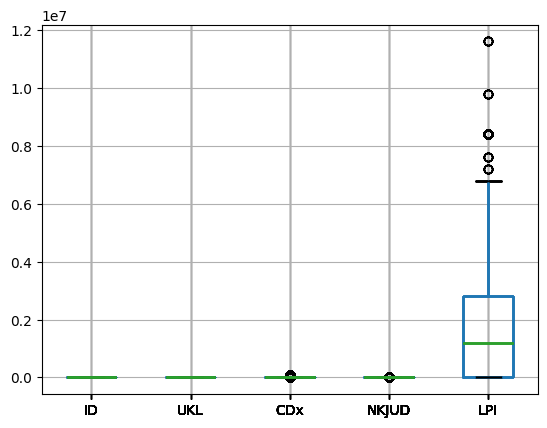

In [27]:
# check for outliers
df1.boxplot()
plt.show()


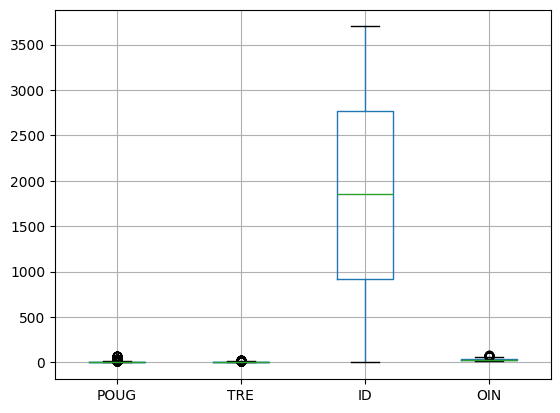

In [29]:
# read and inspect the data
df2 = pd.read_csv('../data/table_2.csv', delimiter=';')
df2.head()


In [31]:
# Understanding the data at hand
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POUG    4070 non-null   int64  
 1   TRE     4070 non-null   float64
 2   ID      4070 non-null   int64  
 3   ZUB     4070 non-null   object 
 4   VOL     4070 non-null   object 
 5   UIO     4027 non-null   object 
 6   VBNM    4070 non-null   object 
 7   Type    4070 non-null   object 
 8   OIN     4028 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 286.3+ KB


In [32]:
# get some statistics that describe the data
df2.describe()


,POUG,TRE,ID,OIN
count,4070.000000,4070.000000,4070.000000,4028.000000
mean,4.141032,3.412081,1848.971744,32.837974
std,6.696288,4.322153,1067.311062,12.709425
min,0.000000,0.000000,0.000000,13.750000
25%,0.000000,0.500000,919.250000,22.920000
50%,2.000000,1.750000,1852.500000,28.670000
75%,6.000000,5.000000,2771.750000,40.830000
max,67.000000,28.500000,3699.000000,80.250000


In [33]:
# check for missing values
df2.isnull().sum()

POUG     0
TRE      0
ID       0
ZUB      0
VOL      0
UIO     43
VBNM     0
Type     0
OIN     42
dtype: int64

In [34]:
# check for duplicates that may affect the model
df2.duplicated().sum()

370

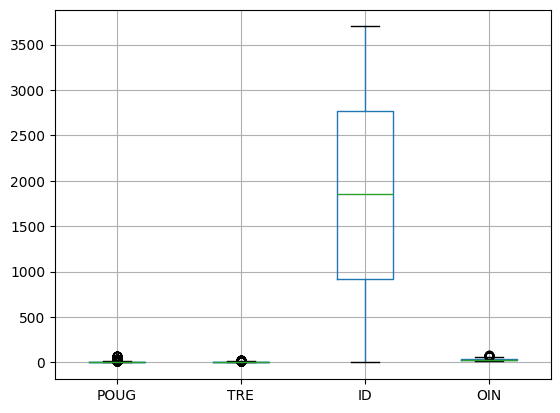

In [35]:
df2.boxplot()
plt.show()

In [45]:
# check for duplicates that may affect the model
len((df1['ID'])), len((df2['ID'])), len(set(df1['ID'])), len(set(df2['ID']))

(4070, 4070, 3700, 3700)

In [49]:
# check for overlapped duplicates
set1 = set(df1[df1.duplicated()]['ID'])
set2 = set(df2[df2.duplicated()]['ID'])

len(set1 - set2), len(set2 - set1), len(set1.intersection(set2))

(315, 316, 32)

In [55]:
# left  merge on the ID column to get the features of df1 in df2 with the target feature type
df = pd.merge(df2, df1, how='left', on='ID')
#  Dropping the duplicates after merging to ensure the highest quality data
df = df.drop_duplicates()
df.head()

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,1,1.750,0,t,f,uuuu,t,n,17.92,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,0,0.290,1,f,f,wwww,f,n,16.92,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,1,0.000,2,f,f,wwww,t,n,31.25,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,0,0.335,3,f,f,uuuu,f,n,48.17,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,0,0.500,4,t,f,wwww,f,n,32.33,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq


In [56]:
len(df)

3700

In [65]:
#  check for missing values in the merged data
df.isnull().sum()


POUG        0
TRE         0
ID          0
ZUB         0
VOL         0
UIO        39
VBNM        0
Type        0
OIN        39
UKL         0
GJAH       64
ZIK      2145
HUI         0
ERZ        64
CDx         0
BJZHD      66
NKJUD     100
LPI       100
BJKG       66
dtype: int64